Assignment -2

Name : Aman Varma Rudraraju

Reg.No: 20BDS0325

Mail: amanvarma.rudraraju2020@vitstudent.ac.in

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
#Task-1 Reading the dataset and Performing Data preprocessing
df=pd.read_csv("drug200.csv")
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [55]:
# Determining the shape of the Dataset

df.shape

(200, 6)

In [56]:
# Determining unique values of suitable columns

df["BP"].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [57]:
df["Cholesterol"].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [58]:
df["Drug"].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [59]:
#Checking for null values

df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<Axes: >

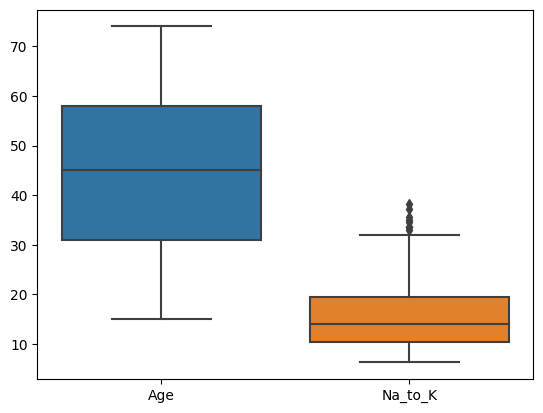

In [60]:
sns.boxplot(df)

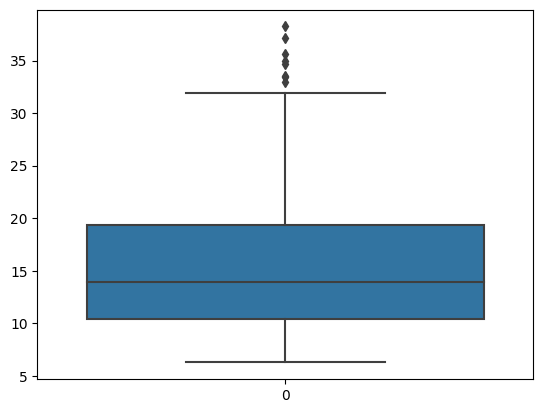

In [61]:
sns.boxplot(df.Na_to_K)
q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)


In [62]:
IQR = q3 - q1
IQR

8.9345

In [63]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [64]:
df.median()

<ipython-input-64-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age        45.0000
Na_to_K    13.9365
dtype: float64

<Axes: >

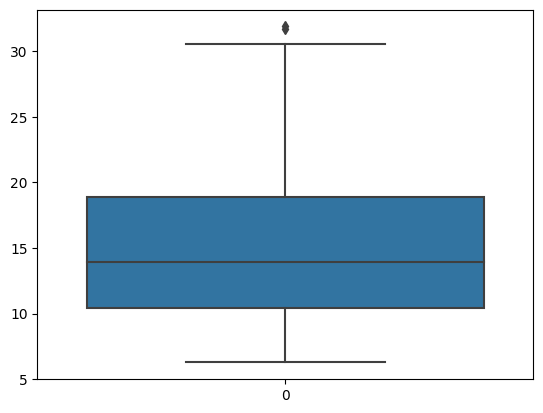

In [14]:
df['Na_to_K'] =np.where(df['Na_to_K']>upper_limit,13.9365,df['Na_to_K'])
sns.boxplot(df.Na_to_K)

In [65]:
x=df.iloc[:,0:5]
y=df.iloc[:,5]

x.head(),y.head()

(   Age Sex      BP Cholesterol  Na_to_K
 0   23   F    HIGH        HIGH   25.355
 1   47   M     LOW        HIGH   13.093
 2   47   M     LOW        HIGH   10.114
 3   28   F  NORMAL        HIGH    7.798
 4   61   F     LOW        HIGH   18.043,
 0    DrugY
 1    drugC
 2    drugC
 3    drugX
 4    DrugY
 Name: Drug, dtype: object)

In [66]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

le = LabelEncoder() # initialize the lib

df['Sex']= le.fit_transform(df['Sex'])
df['BP']= le.fit_transform(df['BP'])
df['Cholesterol']= le.fit_transform(df['Cholesterol'])
df['Drug']= le.fit_transform(df['Drug'])

In [67]:
df['BP']

0      0
1      1
2      1
3      2
4      1
      ..
195    1
196    1
197    2
198    2
199    1
Name: BP, Length: 200, dtype: int64

In [68]:
x=df.iloc[:,0:5]
y=df.iloc[:,5]

x.head(),y.head()

(   Age  Sex  BP  Cholesterol  Na_to_K
 0   23    0   0            0   25.355
 1   47    1   1            0   13.093
 2   47    1   1            0   10.114
 3   28    0   2            0    7.798
 4   61    0   1            0   18.043,
 0    0
 1    3
 2    3
 3    4
 4    0
 Name: Drug, dtype: int64)

In [69]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=7)
xtrain,ytrain

(     Age  Sex  BP  Cholesterol  Na_to_K
 88    37    0   0            1   23.091
 58    60    1   2            1   10.091
 113   65    0   1            1   13.769
 149   22    1   1            0    8.151
 36    32    1   0            1    9.445
 ..   ...  ...  ..          ...      ...
 151   68    1   0            0   11.009
 67    17    1   2            1   10.832
 25    28    0   0            1   18.809
 196   16    1   1            0   12.006
 175   73    0   0            0   18.348
 
 [140 rows x 5 columns],
 88     0
 58     4
 113    4
 149    3
 36     1
       ..
 151    2
 67     4
 25     0
 196    3
 175    0
 Name: Drug, Length: 140, dtype: int64)

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(21,input_dim=5,activation="relu"))

model.add(Dense(24,activation="relu"))

model.add(Dense(22,activation="relu"))

model.add(Dense(20,activation="relu"))

model.add(Dense(5,activation="softmax"))


In [71]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [80]:
model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
5/5 [==============================] - 0s 19ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.6995 - val_accuracy: 0.9167
Epoch 2/20
5/5 [==============================] - 0s 6ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.7992 - val_accuracy: 0.8667
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.7833 - val_accuracy: 0.8833
Epoch 4/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.6727 - val_accuracy: 0.9167
Epoch 5/20
5/5 [==============================] - 0s 6ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.6360 - val_accuracy: 0.9167
Epoch 6/20
5/5 [==============================] - 0s 6ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.6646 - val_accuracy: 0.9167
Epoch 7/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.7018 - val_accuracy: 0.9167
Epoch 8/20
5/5 [=================

In [74]:
#Testing the Model
y_preds=model.predict(xtest)

2/2 [==============================] - 0s 5ms/step


In [75]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 21)                126       
                                                                 
 dense_31 (Dense)            (None, 24)                528       
                                                                 
 dense_32 (Dense)            (None, 22)                550       
                                                                 
 dense_33 (Dense)            (None, 20)                460       
                                                                 
 dense_34 (Dense)            (None, 5)                 105       
                                                                 
Total params: 1,769
Trainable params: 1,769
Non-trainable params: 0
_________________________________________________________________


In [76]:
y_preds

array([[5.82075585e-03, 5.29517163e-25, 6.43458689e-11, 1.11131112e-05,
        9.94168103e-01],
       [9.99999940e-01, 0.00000000e+00, 0.00000000e+00, 4.06205812e-33,
        5.59121083e-36],
       [9.99999940e-01, 2.19642615e-36, 4.93234208e-22, 1.23307867e-16,
        1.53491364e-23],
       [9.99804020e-01, 8.88140949e-06, 3.36941375e-05, 1.53418427e-04,
        4.97388380e-11],
       [3.97602515e-03, 4.54730713e-18, 1.94750202e-04, 9.95826721e-01,
        2.49526511e-06],
       [9.74085633e-05, 1.76423611e-12, 2.42818729e-03, 9.97445166e-01,
        2.92525165e-05],
       [9.99999940e-01, 1.30117069e-36, 4.07390078e-32, 1.77921377e-23,
        2.02772702e-25],
       [9.93562341e-01, 4.11033201e-18, 3.43953366e-06, 6.43420173e-03,
        3.47151707e-09],
       [4.84603552e-05, 9.99910653e-01, 3.84519153e-05, 2.26734687e-06,
        2.18323102e-15],
       [2.16177687e-10, 2.33800052e-17, 9.51880264e-09, 3.22399819e-06,
        9.99996722e-01],
       [4.54076954e-08, 2.7718

In [77]:
#Evaluating the model
model.evaluate(xtest,ytest,verbose=0)

[0.5944536328315735, 0.9166666865348816]

In [78]:
#Task-3 Testing with random data

y_preds1=model.predict([[50,0,2,1,113.8]])

1/1 [==============================] - 0s 71ms/step


In [79]:
y_preds1

array([[1., 0., 0., 0., 0.]], dtype=float32)